In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import mlflow
import shap
import lime
import lime.lime_tabular

In [7]:
# Load the data from Fraud_Data.csv
fraud_data = pd.read_csv('../CleanedData/merged_Dataset.csv')

# Drop columns that are not important
fraud_data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'device_id_info', 'lower_bound_ip_address', 'upper_bound_ip_address', 'country'], axis=1, inplace=True)

# Encode categorical variables
fraud_data = pd.get_dummies(fraud_data, columns=['source', 'browser', 'sex'])


In [8]:
# Convert 'signup_purchase_duration' to numerical format
fraud_data['signup_purchase_duration'] = pd.to_timedelta(fraud_data['signup_purchase_duration']).dt.total_seconds()

# Separate features and target variable
X = fraud_data.drop('class', axis=1)
y = fraud_data['class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Start MLflow experiment
mlflow.set_experiment("Fraud Detection")

<Experiment: artifact_location='file:///c:/Users/huawei/Desktop/Week8/Adey-Innovations-Inc/Task3/mlruns/420812445113098344', creation_time=1719136186351, experiment_id='420812445113098344', last_update_time=1719136186351, lifecycle_stage='active', name='Fraud Detection', tags={}>

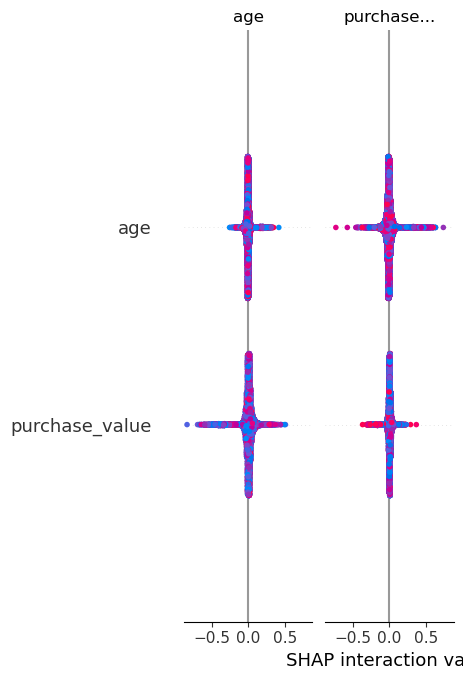

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [10]:
# Decision Tree model training
with mlflow.start_run(run_name="Decision Tree"):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Log parameters and metrics
    mlflow.log_params(model.get_params())
    mlflow.log_metric("accuracy", accuracy)
    
    # Log the trained model
    mlflow.sklearn.log_model(model, "DecisionTreeModel")
    
    # Calculate SHAP values for model explainability
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    
    # SHAP Summary Plot
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    plt.savefig("shap_summary_plot.png")
    plt.close()
    mlflow.log_artifact("shap_summary_plot.png")
    
    # SHAP Force Plot
    shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], show=False)
    plt.savefig("shap_force_plot.png")
    plt.close()
    mlflow.log_artifact("shap_force_plot.png")
    
    # SHAP Dependence Plot
    shap.dependence_plot("feature_name", shap_values, X_test, interaction_index="interaction_index", show=False)
    plt.savefig("shap_dependence_plot.png")
    plt.close()
    mlflow.log_artifact("shap_dependence_plot.png")
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

In [ ]:
# EDA for class imbalance
class_counts = fraud_data['class'].value_counts()
fraud_percentage = class_counts[1] / (class_counts[0] + class_counts[1]) * 100
print("Percentage of fraud cases:", fraud_percentage)


In [ ]:
# Feature importance plot
with mlflow.start_run(run_name="Feature Importance"):
    model = DecisionTreeClassifier()
    model.fit(X, y)
    feature_importance = model.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.savefig("feature_importance.png")
    plt.close()
    # Log the feature importance plot
    mlflow.log_artifact("feature_importance.png")

In [ ]:
# Random Forest model training
with mlflow.start_run(run_name="Random Forest"):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Log parameters and metrics
    mlflow.log_params(model.get_params())
    mlflow.log_metric("accuracy", accuracy)
    
    # Log the trained model
    mlflow.sklearn.log_model(model, "RandomForestModel")
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

In [ ]:
# Gradient Boosting model training
with mlflow.start_run(run_name="Gradient Boosting"):
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # Log parameters and metrics
    mlflow.log_params(model.get_params())
    mlflow.log_metric("accuracy", accuracy)
    # Log the trained model
    mlflow.sklearn.log_model(model, "GradientBoostingModel")
    accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
# MLP model training
with mlflow.start_run(run_name="MLP"):
    model = MLPClassifier()
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # Log parameters and metrics
    mlflow.log_params(model.get_params())
    mlflow.log_metric("accuracy", accuracy)
    # Log the trained model
    mlflow.sklearn.log_model(model, "MLPModel")
   
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)